In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

#definimos nuestras unidades
um = 1e-6 #micrometros
mm = 1e-3 #milimetros
nm= 1e-9 #nanometros

w_length = 650*nm #longitud de onda de luz roja monocromática y coherente
dx=dy=100*um #tamaño de pixel que se considera

In [37]:
#DFT 1D
def dft_(Uin,dx,idft=0):
    
    #Se toma el N,se asume que el campo es cuadrado
    N = Uin.shape[0] 
    
    df=1/(dx*N)
    
    if(idft==0):
        delta=dx
        s=-1
    else:
        delta=df
        s=1
    
    x = np.asarray(Uin)
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(s*2j * np.pi * k * n / N)
    
    Uout=delta*np.dot(M, x)
    
    return Uout                  
    
#pad para la dft2. m=n para imagenes cuadradas    
def pad2(x):
   m, n = np.shape(x)
   F = np.zeros((m,n), dtype = x.dtype)
   F[0:m, 0:n] = x
   return F

#DFT 2D
def dft2_(f,dx,idft=0):
    f= pad2(f)
        
    return np.fft.fftshift(np.transpose(dft_(np.transpose(dft_(f,dx,idft)),dx,idft)))

In [45]:
def EAngD(Uin, wvl, d1, z):
    """
    Propagación usando el método de espectro angular discret0
    Devuelve amplitud compleja tras la propagacion

    """
    N = Uin.shape[0]    #Se asume que es cuadrado
    k = 2*np.pi/wvl  #vector de onda optico

    #Coordenadas en el plano de entrada
    x1,y1 = np.meshgrid( np.arange(-N/2.,N/2.) * d1,
                            np.arange(-N/2.,N/2.) * d1)
    #Coordenadas del plano de observación
    d2 = 1/(N*d1)
    x2,y2 = np.meshgrid( np.arange(-N/2.,N/2.) * d2,
                            np.arange(-N/2.,N/2.) * d2 )

    
    
    #Evaluación de la difracción
    A = (dft2_(Uin, d1,0))*np.exp(1j*k*z*(np.sqrt(1-(((wvl*d1)**2)*((x2**2)+(y2**2))))))
    Uout=dft2_(A,d2,0)
    Uout=np.fft.fftshift(Uout)

    return Uout

C:\Users\juanc\AppData\Local\Temp/ipykernel_18840/4290563788.py:5: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(T),cmap="gray")


Tomada de https://es.vexels.com/png-svg/vista-previa/218221/silueta-de-gafas-de-sol-con-montura-cuadrada


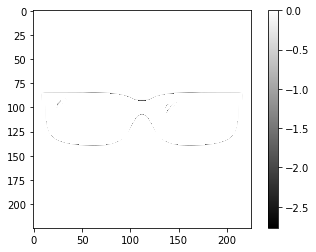

In [47]:
T = cv2.imread("gafas.png",0)
T = T/np.max(T)

plt.figure()
plt.imshow(T,cmap="gray")
plt.colorbar()
plt.show
print('Tomada de https://es.vexels.com/png-svg/vista-previa/218221/silueta-de-gafas-de-sol-con-montura-cuadrada')

El proceso tardó: 0.19800734519958496 s


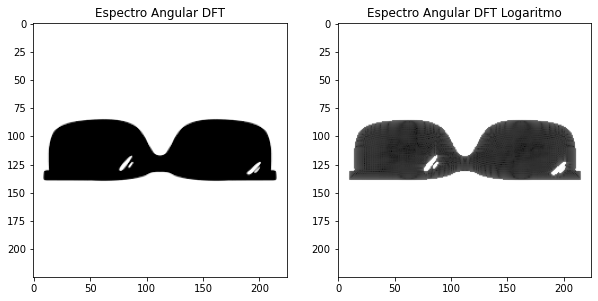

In [48]:
z=4000*mm

#contar tiempo
start = time.time()

#Transformada de Fresnel FFT
sc=EAngD(T,w_length,dx,z)

#finaliza tiempo
end = time.time()
print('El proceso tardó:', end - start,'s')

fig, arreglo_plots = plt.subplots(1,2, figsize=(10, 7))
arreglo_plots[0].set_title('Espectro Angular DFT')
arreglo_plots[0].imshow(np.abs(sc),cmap='gray')
arreglo_plots[1].set_title('Espectro Angular DFT Logaritmo')
arreglo_plots[1].imshow(np.log(np.abs(sc)),cmap='gray')